In [1]:
import numpy as np
import pandas as pd

# 一、索引器
## 1.表的列索引
列索引是最常见的索引形式，一般通过 [] 来实现。通过 [列名] 可以从 DataFrame 中取出相应的列，返回值为 Series ，例如从表中取出姓名一列：

In [2]:
df = pd.read_csv('data/learn_pandas.csv',
                  usecols = ['School', 'Grade', 'Name', 'Gender',
                             'Weight', 'Transfer'])
df['Name'].head()

0      Gaopeng Yang
1    Changqiang You
2           Mei Sun
3      Xiaojuan Sun
4       Gaojuan You
Name: Name, dtype: object

如果要取出多个列，则可以通过 [列名组成的列表] ，其返回值为一个 DataFrame ，例如从表中取出性别和姓名两列：

In [3]:
df[['Gender', 'Name']].head()

,Gender,Name
0,Female,Gaopeng Yang
1,Male,Changqiang You
2,Male,Mei Sun
3,Female,Xiaojuan Sun
4,Male,Gaojuan You


此外，若要取出单列，且列名中不包含空格，则可以用 .列名 取出，这和 [列名] 是等价的：

In [4]:
df.Name.head()

0      Gaopeng Yang
1    Changqiang You
2           Mei Sun
3      Xiaojuan Sun
4       Gaojuan You
Name: Name, dtype: object

## 2.序列的行索引
### a.以字符串为索引的`Series`
如果取出单个索引的对应元素，则可以使用` [item] `，若 `Series `只有单个值对应，则返回这个标量值，如果有多个值对应，则返回一个 `Series`：

In [5]:
s = pd.Series([1,2,3,4,5,6],index=['a', 'b', 'a', 'a', 'a', 'c'])
s['a']

a    1
a    3
a    4
a    5
dtype: int64

In [6]:
s['b']

2

果取出多个索引的对应元素，则可以使用 [items的列表] ：

In [7]:
s[['a','b']]

a    1
a    3
a    4
a    5
b    2
dtype: int64

如果想要取出某两个索引之间的元素，**并且这两个索引是在整个索引中唯一出现**，则可以使用切片，同时需要注意这里的**切片会包含两个端点**：

In [8]:
s['b':'c':2]

b    2
a    4
c    6
dtype: int64

如果前后端点的值存在重复，即非唯一值，那么需要经过排序才能使用切片：

In [9]:
s.sort_index()['a':'c']

a    1
a    3
a    4
a    5
b    2
c    6
dtype: int64

### b.以整数为索引的Series
在使用数据的读入函数时，如果不特别指定所对应的列作为索引，那么会生成从0开始的整数索引作为默认索引。当然，任意一组符合长度要求的整数都可以作为索引。

和字符串一样，如果使用 [int] 或 [int_list] ，则可以取出对应索引 元素 的值：

In [10]:
s = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'],
               index=[1, 3, 1, 2, 5, 4])
s[1]

1    a
1    c
dtype: object

In [11]:
s[[2,3]]

2    d
3    b
dtype: object

如果使用整数切片，则会取出对应索引位置的值，注意**这里的整数切片同 Python 中的切片一样不包含右端点**：

In [12]:
s[1:4]

3    b
1    c
2    d
dtype: object

>关于索引类型的说明<br/>
如果不想陷入麻烦，那么请不要把纯浮点以及任何混合类型（字符串、整数、浮点类型等的混合）作为索引，否则可能会在具体的操作时报错或者返回非预期的结果，并且在实际的数据分析中也不存在这样做的动机。

## 3.loc索引器
前面讲到了对 `DataFrame` 的列进行选取，下面要讨论其行的选取。对于表而言，有两种索引器，一种是基于 元素 的 `loc` 索引器，另一种是基于 位置 的 `iloc` 索引器。

`loc` 索引器的一般形式是 `loc[*, *]` ，其中第一个 * 代表行的选择，第二个 * 代表列的选择，如果省略第二个位置写作 `loc[*]` ，这个 * 是指行的筛选。其中， * 的位置一共有五类合法对象，分别是：**单个元素、元素列表、元素切片、布尔列表以及函数**，下面将依次说明。

为了演示相应操作，先利用 set_index 方法把 Name 列设为索引，关于该函数的其他用法将在多级索引一章介绍。

In [13]:
df_demo = df.set_index('Name')
df_demo.head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N


### a.*为单个元素
此时，直接取出相应的行或列，如果该元素在索引中重复则结果为 `DataFrame`，否则为 `Series `

In [14]:
df_demo.loc['Qiang Sun']# 多个人叫此名

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Qiang Sun,Tsinghua University,Junior,Female,53.0,N
Qiang Sun,Tsinghua University,Sophomore,Female,40.0,N
Qiang Sun,Shanghai Jiao Tong University,Junior,Female,NaN,N


In [15]:
df_demo.loc['Quan Zhao']#名字唯一

School      Shanghai Jiao Tong University
Grade                              Junior
Gender                             Female
Weight                                 53
Transfer                                N
Name: Quan Zhao, dtype: object

也可以同时选择行和列：

In [16]:
df_demo.loc['Qiang Sun','School']

Name
Qiang Sun              Tsinghua University
Qiang Sun              Tsinghua University
Qiang Sun    Shanghai Jiao Tong University
Name: School, dtype: object

### b.*为元素列表
此时，取出列表中所有元素值对应的行或列

In [17]:
df_demo.loc[['Qiang Sun','Quan Zhao'], ['School','Gender']]

,School,Gender
Name,,
Qiang Sun,Tsinghua University,Female
Qiang Sun,Tsinghua University,Female
Qiang Sun,Shanghai Jiao Tong University,Female
Quan Zhao,Shanghai Jiao Tong University,Female


### c.*为切片
之前的 `Series `使用字符串索引时提到，如果是唯一值的起点和终点字符，那么就可以使用切片，并且包含两个端点，如果不唯一则报错：

In [18]:
df_demo.loc['Gaojuan You':'Gaoqiang Qian', 'School':'Gender']

,School,Grade,Gender
Name,,,
Gaojuan You,Fudan University,Sophomore,Male
Xiaoli Qian,Tsinghua University,Freshman,Female
Qiang Chu,Shanghai Jiao Tong University,Freshman,Female
Gaoqiang Qian,Tsinghua University,Junior,Female


In [19]:
df_demo.sort_index().loc['Gaojuan You':'Qiang Sun', 'School':'Gender']

,School,Grade,Gender
Name,,,
Gaojuan You,Fudan University,Sophomore,Male
Gaojuan Zhao,Shanghai Jiao Tong University,Senior,Female
Gaoli Feng,Tsinghua University,Freshman,Female
Gaoli Wu,Tsinghua University,Senior,Female
Gaoli Xu,Shanghai Jiao Tong University,Sophomore,Female
...,...,...,...
Qiang Shi,Fudan University,Freshman,Female
Qiang Shi,Shanghai Jiao Tong University,Senior,Female
Qiang Sun,Shanghai Jiao Tong University,Junior,Female


需要注意的是，如果 `DataFrame` 使用整数索引，其使用整数切片的时候和上面字符串索引的要求一致，都是元素切片，**包含端点**且起点、终点不允许有重复值。

In [20]:
df_loc_slice_demo = df_demo.copy()
df_loc_slice_demo.index = range(df_demo.shape[0])
df_loc_slice_demo.loc[5:8]

,School,Grade,Gender,Weight,Transfer
5,Tsinghua University,Freshman,Female,51.0,N
6,Shanghai Jiao Tong University,Freshman,Female,52.0,N
7,Tsinghua University,Junior,Female,50.0,N
8,Tsinghua University,Freshman,Female,48.0,N


In [21]:
df_loc_slice_demo.loc[8:5]# 没有返回，说明不是整数位置切片

,School,Grade,Gender,Weight,Transfer


In [22]:
df_loc_slice_demo.loc[8:5:-1]# 没有返回，说明不是整数位置切片

,School,Grade,Gender,Weight,Transfer
8,Tsinghua University,Freshman,Female,48.0,N
7,Tsinghua University,Junior,Female,50.0,N
6,Shanghai Jiao Tong University,Freshman,Female,52.0,N
5,Tsinghua University,Freshman,Female,51.0,N


### d.*为布尔列表
在实际的数据处理中，根据条件来筛选行是极其常见的，此处传入 `loc `的布尔列表与 `DataFrame` 长度相同，且列表为 `True `的位置所对应的行会被选中，` False `则会被剔除。

例如，选出体重超过70kg的学生：

In [23]:
df_demo.loc[df_demo['Weight']>70].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaopeng Zhou,Shanghai Jiao Tong University,Freshman,Male,74.0,N
Xiaofeng Sun,Tsinghua University,Senior,Male,71.0,N
Qiang Zheng,Shanghai Jiao Tong University,Senior,Male,87.0,N


前面所提到的传入元素列表，也可以通过 `isin `方法返回的布尔列表等价写出，例如选出所有大一和大四的同学信息：

In [24]:
df_demo.loc[df_demo['Grade'].isin(['Freshman', 'Senior'])].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaoli Qian,Tsinghua University,Freshman,Female,51.0,N
Qiang Chu,Shanghai Jiao Tong University,Freshman,Female,52.0,N


对于复合条件而言，可以用 `|（或）, &（且）, ~（取反） `的组合来实现，例如选出复旦大学中体重超过70kg的大四学生，或者北大男生中体重超过80kg的非大四的学生：

In [25]:
condition_1_1 = df_demo.School == 'Fudan University'

condition_1_2 = df_demo.Grade == 'Senior'

condition_1_3 = df_demo.Weight > 70

condition_1 = condition_1_1 & condition_1_2 & condition_1_3

condition_2_1 = df_demo.School == 'Peking University'

condition_2_2 = df_demo.Grade == 'Senior'

condition_2_3 = df_demo.Weight > 80

condition_2 = condition_2_1 & (~condition_2_2) & condition_2_3

df_demo.loc[condition_1 | condition_2]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Qiang Han,Peking University,Freshman,Male,87.0,N
Chengpeng Zhou,Fudan University,Senior,Male,81.0,N
Changpeng Zhao,Peking University,Freshman,Male,83.0,N
Chengpeng Qian,Fudan University,Senior,Male,73.0,Y


>练一练<br/>
`select_dtypes` 是一个实用函数，它能够从表中选出相应类型的列，若要选出所有数值型的列，只需使用 `.select_dtypes('number'`) ，请利用布尔列表选择的方法结合 `DataFrame` 的 `dtypes` 属性在 `learn_pandas` 数据集上实现这个功能。

In [26]:
df_demo.dtypes

School       object
Grade        object
Gender       object
Weight      float64
Transfer     object
dtype: object

In [27]:
df_demo.loc[df_demo.index,df_demo.dtypes=='float'].head()

,Weight
Name,
Gaopeng Yang,46.0
Changqiang You,70.0
Mei Sun,89.0
Mei Sun,50.0
Xiaojuan Sun,41.0


### e.*为函数
这里的函数，**必须以前面的四种合法形式之一为返回值，并且函数的输入值为 `DataFrame` 本身**。假设仍然是上述复合条件筛选的例子，可以把逻辑写入一个函数中再返回，需要注意的是函数的形式参数 x 本质上即为 `df_demo `：

In [28]:
def condition(x):
    condition_1_1 = x.School == 'Fudan University'
    condition_1_2 = x.Grade == 'Senior'
    condition_1_3 = x.Weight > 70
    condition_1 = condition_1_1 & condition_1_2 & condition_1_3
    condition_2_1 = x.School == 'Peking University'
    condition_2_2 = x.Grade == 'Senior'
    condition_2_3 = x.Weight > 80
    condition_2 = condition_2_1 & (~condition_2_2) & condition_2_3
    result = condition_1 | condition_2
    return result

df_demo.loc[condition]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Qiang Han,Peking University,Freshman,Male,87.0,N
Chengpeng Zhou,Fudan University,Senior,Male,81.0,N
Changpeng Zhao,Peking University,Freshman,Male,83.0,N
Chengpeng Qian,Fudan University,Senior,Male,73.0,Y


此外，还支持使用 `lambda` 表达式，其返回值也同样必须是先前提到的四种形式之一：

In [29]:
df_demo.loc[lambda x:'Quan Zhao', lambda x:'Gender']

'Female'

由于函数无法返回如 `start: end: step` 的切片形式，故返回切片时要用 `slice `对象进行包装：

In [30]:
df_demo.loc[lambda x: slice('Gaojuan You', 'Gaoqiang Qian')]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaoli Qian,Tsinghua University,Freshman,Female,51.0,N
Qiang Chu,Shanghai Jiao Tong University,Freshman,Female,52.0,N
Gaoqiang Qian,Tsinghua University,Junior,Female,50.0,N


最后需要指出的是，对于 Series 也可以使用 loc 索引，其遵循的原则与 DataFrame 中用于行筛选的 loc[*] 完全一致，此处不再赘述。

>不要使用链式赋值<br/>
在对表或者序列赋值时，应当在使用一层索引器后直接进行赋值操作，这样做是由于进行多次索引后赋值是赋在临时返回的 `copy` 副本上的，而没有真正修改元素从而报出 `ettingWithCopyWarning` 警告。例如，下面给出的例子：

In [31]:
df_chain = pd.DataFrame([[0,0],[1,0],[-1,0]], columns=list('AB'))
df_chain

,A,B
0,0,0
1,1,0
2,-1,0


In [32]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('error')
    try:
        df_chain[df_chain.A!=0].B = 1 # 使用方括号列索引后，再使用点的列索引
    except Warning as w:
        Warning_Msg = w
        
print(Warning_Msg)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
df_chain

,A,B
0,0,0
1,1,0
2,-1,0


In [34]:
df_chain.loc[df_chain.A!=0,'B'] = 1
df_chain

,A,B
0,0,0
1,1,1
2,-1,1


## 4.iloc索引器
`iloc` 的使用与` loc` 完全类似，只不过是针对位置进行筛选，在相应的 * 位置处一共也有五类合法对象，分别是：整数、整数列表、整数切片、布尔列表以及函数，函数的返回值必须是前面的四类合法对象中的一个，其输入同样也为 `DataFrame` 本身。

In [35]:
df_demo.head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N


In [36]:
df_demo.iloc[1, 1] # 第二行第二列

'Freshman'

In [37]:
df_demo.iloc[[0, 1], [0, 1]] # 前两行前两列

,School,Grade
Name,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman
Changqiang You,Peking University,Freshman


In [38]:
df_demo.iloc[1: 4, 2:4] # 切片不包含结束端点

,Gender,Weight
Name,,
Changqiang You,Male,70.0
Mei Sun,Male,89.0
Xiaojuan Sun,Female,41.0


In [39]:
df_demo.iloc[lambda x: slice(1, 4)]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N


在使用布尔列表的时候要特别注意，不能传入 `Series` 而必须传入序列的 `values` ，否则会报错。因此，在**使用布尔筛选的时候还是应当优先考虑 `loc` 的方式。**

例如，选出体重超过80kg的学生：

In [40]:
df_demo.iloc[(df_demo['Weight']>80).values].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Qiang Zheng,Shanghai Jiao Tong University,Senior,Male,87.0,N
Qiang Han,Peking University,Freshman,Male,87.0,N
Chengpeng Zhou,Fudan University,Senior,Male,81.0,N
Feng Han,Shanghai Jiao Tong University,Sophomore,Male,82.0,N


对 `Series` 而言同样也可以通过 `iloc` 返回相应位置的值或子序列：

In [41]:
df_demo.School.iloc[1]

'Peking University'

In [42]:
df_demo.School.iloc[1:5:2]

Name
Changqiang You    Peking University
Xiaojuan Sun       Fudan University
Name: School, dtype: object

## 5.query方法
在 `pandas` 中，支持把字符串形式的查询表达式传入 `query` 方法来查询数据，**其表达式的执行结果必须返回布尔列表。**在进行复杂索引时，由于这种检索方式无需像普通方法一样重复使用 DataFrame 的名字来引用列名，一般而言会使代码长度在不降低可读性的前提下有所减少。

例如，将 `loc` 一节中的复合条件查询例子可以如下改写：

In [43]:
df.query('((School == "Fudan University")&'
         ' (Grade == "Senior")&'
         ' (Weight > 70))|'
         '((School == "Peking University")&'
         ' (Grade != "Senior")&'
         ' (Weight > 80))')

,School,Grade,Name,Gender,Weight,Transfer
38,Peking University,Freshman,Qiang Han,Male,87.0,N
66,Fudan University,Senior,Chengpeng Zhou,Male,81.0,N
99,Peking University,Freshman,Changpeng Zhao,Male,83.0,N
131,Fudan University,Senior,Chengpeng Qian,Male,73.0,Y


在 `query` 表达式中，帮用户注册了所有来自 `DataFrame` 的列名，所有属于该 `Series` 的方法都可以被调用，和正常的函数调用并没有区别，例如查询体重超过均值的学生：

In [44]:
df.query('Weight > Weight.mean()').head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
14,Tsinghua University,Senior,Xiaomei Zhou,Female,57.0,N


In [45]:
df.loc[df['Weight']>df['Weight'].mean()].head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
14,Tsinghua University,Senior,Xiaomei Zhou,Female,57.0,N


>query中引用带空格的列名<br/>
对于含有空格的列名，需要使用 `col name` 的方式进行引用。

同时，在 `query `中还注册了若干英语的字面用法，帮助提高可读性，例如： `or, and, or, is in, not in `。例如，筛选出男生中不是大一大二的学生:

In [46]:
df.query('(Grade not in ["Freshman", "Sophomore"]) and'
         '(Gender == "Male")').head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
16,Tsinghua University,Junior,Xiaoqiang Qin,Male,68.0,N
17,Tsinghua University,Junior,Peng Wang,Male,65.0,N
18,Tsinghua University,Senior,Xiaofeng Sun,Male,71.0,N
21,Shanghai Jiao Tong University,Senior,Xiaopeng Shen,Male,62.0,NaN


此外，在字符串中出现与列表的比较时，` == `和` != `分别表示元素出现在列表和没有出现在列表，等价于` is in `和 `not in`，例如查询所有大三和大四的学生：

In [47]:
df.query('Grade == ["Junior", "Senior"]').head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
7,Tsinghua University,Junior,Gaoqiang Qian,Female,50.0,N
9,Peking University,Junior,Juan Xu,Female,NaN,N
11,Tsinghua University,Junior,Xiaoquan Lv,Female,43.0,N
12,Shanghai Jiao Tong University,Senior,Peng You,Female,48.0,NaN


对于 `query `中的字符串，如果要引用外部变量，只需在变量名前加 `@` 符号。例如，取出体重位于70kg到80kg之间的学生：

In [48]:
w = 43.0
df.query('Weight == @w')

,School,Grade,Name,Gender,Weight,Transfer
11,Tsinghua University,Junior,Xiaoquan Lv,Female,43.0,N
29,Peking University,Sophomore,Changmei Xu,Female,43.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
62,Tsinghua University,Freshman,Xiaoli Xu,Female,43.0,N
63,Fudan University,Freshman,Gaofeng Zhao,Female,43.0,N
90,Fudan University,Junior,Gaoqiang Zhou,Female,43.0,N
140,Peking University,Freshman,Qiang Zhang,Female,43.0,N
151,Tsinghua University,Sophomore,Feng Qian,Female,43.0,N
167,Shanghai Jiao Tong University,Sophomore,Xiaoqiang Feng,Female,43.0,N
185,Peking University,Freshman,Chunmei Wang,Female,43.0,N


In [49]:
df.query('School == ["Fudan University","Peking University"]').head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
9,Peking University,Junior,Juan Xu,Female,NaN,N
15,Fudan University,Freshman,Changqiang Yang,Female,49.0,N


## 6.随机抽样
如果把 `DataFrame` 的每一行看作一个样本，或把每一列看作一个特征，再把整个 `DataFrame` 看作总体，想要对样本或特征进行随机抽样就可以用 `sample` 函数。有时在拿到大型数据集后，想要对统计特征进行计算来了解数据的大致分布，但是这很费时间。同时，由于许多统计特征在等概率不放回的简单随机抽样条件下，是总体统计特征的无偏估计，比如样本均值和总体均值，那么就可以先从整张表中抽出一部分来做近似估计。

`sample` 函数中的主要参数为 `n, axis, frac, replace, weights` ，前三个分别是指抽样数量、抽样的方向（0为行、1为列）和抽样比例（0.3则为从总体中抽出30%的样本）。

`replace` 和 `weights` 分别是指是否放回和每个样本的抽样相对概率，当 `replace = True` 则表示有放回抽样。例如，对下面构造的 `df_sample `以` value `值的相对大小为抽样概率进行有放回抽样，抽样数量为3。

In [50]:
df_sample = pd.DataFrame({'id': list('abcde'),
                          'value': [1, 2, 3, 4, 90]})
df_sample

,id,value
0,a,1
1,b,2
2,c,3
3,d,4
4,e,90


In [51]:
df_sample.sample(3, replace = True, weights = [1,1,1,1,1])

,id,value
2,c,3
4,e,90
3,d,4


# 二、多级索引
## 1.多级索引及其表的结构
为了更加清晰地说明具有多级索引的 `DataFrame` 结构，下面新构造一张表，读者可以忽略这里的构造方法，它们将会在第4小节被更详细地讲解。

In [52]:
np.random.seed(0)

multi_index = pd.MultiIndex.from_product([list('ABCD'),
              df.Gender.unique()], names=('School', 'Gender'))

multi_column = pd.MultiIndex.from_product([['Height', 'Weight'],
               df.Grade.unique()], names=('Indicator', 'Grade'))


df_multi = pd.DataFrame(np.c_[(np.random.randn(8,4)*5 + 163).tolist(),
                              (np.random.randn(8,4)*5 + 65).tolist()],
                        index = multi_index,
                        columns = multi_column).round(1)

df_multi

Indicator       Height                           Weight                   \
Grade         Freshman Senior Sophomore Junior Freshman Senior Sophomore   
School Gender                                                              
A      Female    171.8  165.0     167.9  174.2     60.6   55.1      63.3   
       Male      172.3  158.1     167.8  162.2     71.2   71.0      63.1   
B      Female    162.5  165.1     163.7  170.3     59.8   57.9      56.5   
       Male      166.8  163.6     165.2  164.7     62.5   62.8      58.7   
C      Female    170.5  162.0     164.6  158.7     56.9   63.9      60.5   
       Male      150.2  166.3     167.3  159.3     62.4   59.1      64.9   
D      Female    174.3  155.7     163.2  162.1     65.3   66.5      61.8   
       Male      170.7  170.3     163.8  164.9     61.6   63.2      60.9   

Indicator             
Grade         Junior  
School Gender         
A      Female   65.8  
       Male     63.5  
B      Female   74.8  
       Male     68.9  
C      Female   66.9  
       Male     67.1  
D      Female   63.2  
       Male     56.4

下图通过颜色区分，标记了 `DataFrame` 的结构。与单层索引的表一样，具备元素值、行索引和列索引三个部分。其中，这里的行索引和列索引都是 `MultiIndex` 类型，只不过**索引中的一个元素是元组**而不是单层索引中的标量。例如，行索引的第四个元素为 ("B", "Male") ，列索引的第二个元素为 ("Height", "Senior") ，这里需要注意，外层连续出现相同的值时，第一次之后出现的会被隐藏显示，使结果的可读性增强。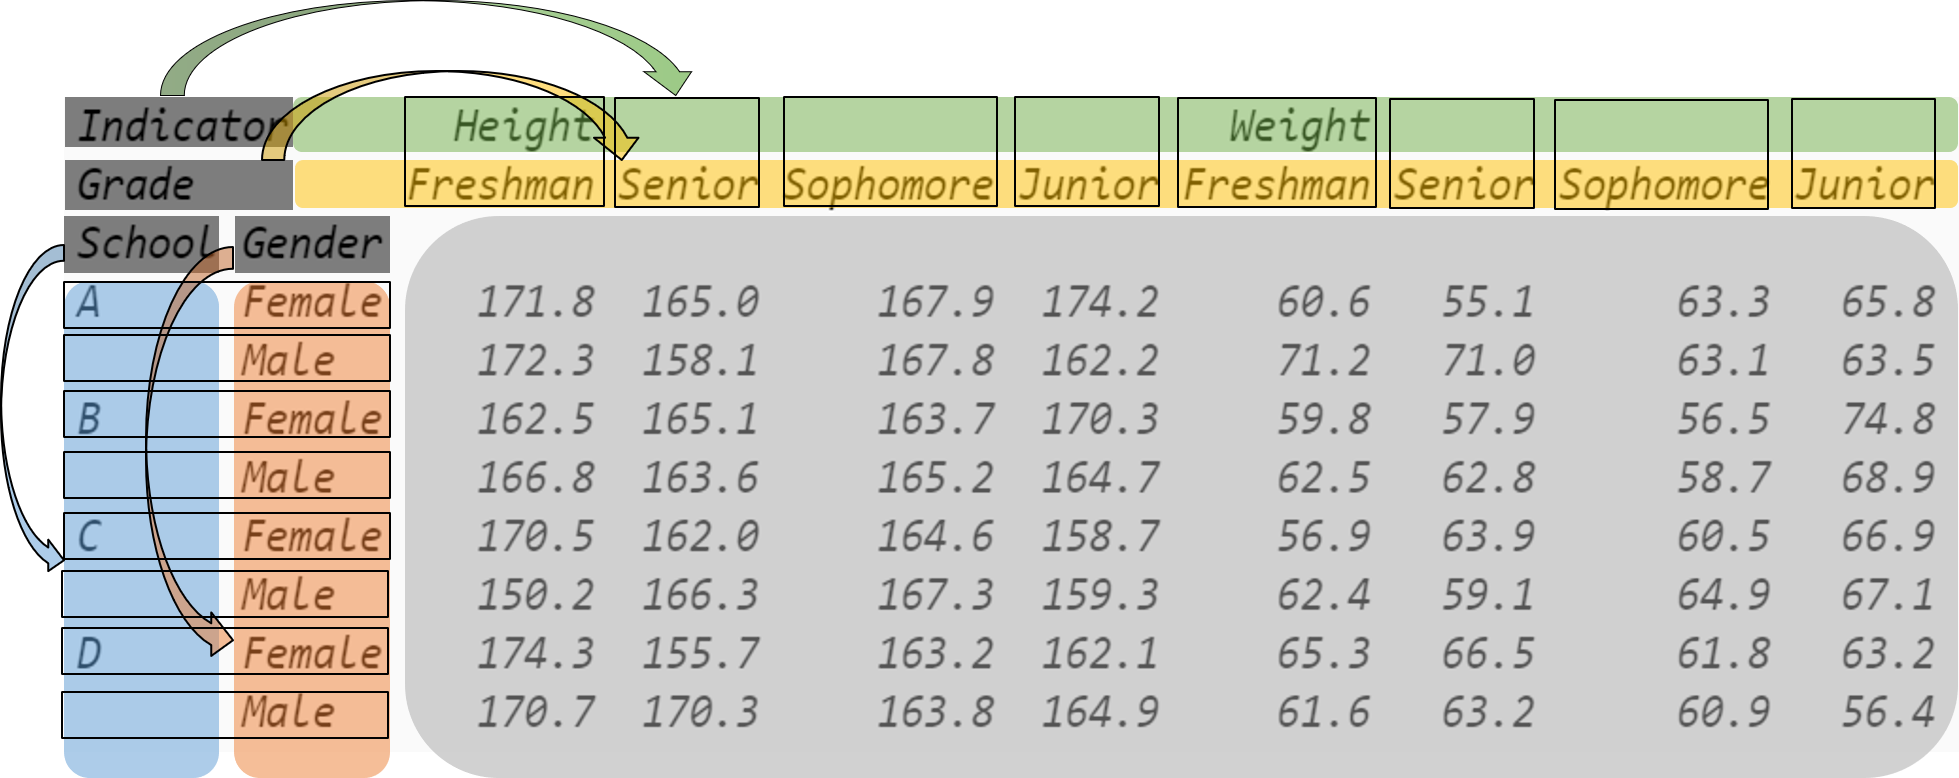

与单层索引类似，` MultiIndex `也具有名字属性，图中的 `School` 和 `Gender` 分别对应了表的第一层和第二层行索引的名字，` Indicator `和 `Grade` 分别对应了第一层和第二层列索引的名字。

索引的名字和值属性分别可以通过 `names` 和 `values` 获得：

In [53]:
df_multi.index.names

FrozenList(['School', 'Gender'])

In [54]:
df_multi.columns.names

FrozenList(['Indicator', 'Grade'])

In [55]:
df_multi.index.values

array([('A', 'Female'), ('A', 'Male'), ('B', 'Female'), ('B', 'Male'),
       ('C', 'Female'), ('C', 'Male'), ('D', 'Female'), ('D', 'Male')],
      dtype=object)

In [56]:
df_multi.columns.values

array([('Height', 'Freshman'), ('Height', 'Senior'),
       ('Height', 'Sophomore'), ('Height', 'Junior'),
       ('Weight', 'Freshman'), ('Weight', 'Senior'),
       ('Weight', 'Sophomore'), ('Weight', 'Junior')], dtype=object)

如果想要得到某一层的索引，则需要通过` get_level_values `获得：

In [57]:
df_multi.index.get_level_values(0)

Index(['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'], dtype='object', name='School')

但对于索引而言，无论是单层还是多层，用户都无法通过` index_obj[0] = item` 的方式来修改元素，也不能通过` index_name[0] = new_name `的方式来修改名字，关于如何修改这些属性的话题将在第三节被讨论。

### 2.多级索引中的loc索引器
熟悉了结构后，现在回到原表，将学校和年级设为索引，此时的行为多级索引，列为单级索引，由于默认状态的列索引不含名字，因此对应于刚刚图中` Indicator` 和 `Grade `的索引名位置是空缺的。

In [58]:
df_multi = df.set_index(['School', 'Grade'])
df_multi.head()

Name  Gender  Weight  \
School                        Grade                                       
Shanghai Jiao Tong University Freshman     Gaopeng Yang  Female    46.0   
Peking University             Freshman   Changqiang You    Male    70.0   
Shanghai Jiao Tong University Senior            Mei Sun    Male    89.0   
Fudan University              Sophomore    Xiaojuan Sun  Female    41.0   
                              Sophomore     Gaojuan You    Male    74.0   

                                        Transfer  
School                        Grade               
Shanghai Jiao Tong University Freshman         N  
Peking University             Freshman         N  
Shanghai Jiao Tong University Senior           N  
Fudan University              Sophomore        N  
                              Sophomore        N

由于多级索引中的单个元素以元组为单位，因此之前在第一节介绍的 `loc` 和 `iloc` 方法完全可以照搬，只需把标量的位置替换成对应的元组。

当传入元组列表或单个元组或返回前二者的函数时，需要先进行索引排序以避免性能警告：

In [59]:
df_sorted = df_multi.sort_index()
df_sorted.loc[('Fudan University', 'Junior')].head()

Name  Gender  Weight Transfer
School           Grade                                         
Fudan University Junior      Yanli You  Female    48.0        N
                 Junior  Chunqiang Chu    Male    72.0        N
                 Junior   Changfeng Lv    Male    76.0        N
                 Junior     Yanjuan Lv  Female    49.0      NaN
                 Junior  Gaoqiang Zhou  Female    43.0        N

In [60]:
df_sorted.loc[[('Fudan University', 'Senior'),
              ('Shanghai Jiao Tong University', 'Freshman')]].head()

Name  Gender  Weight Transfer
School           Grade                                           
Fudan University Senior  Chengpeng Zheng  Female    38.0        N
                 Senior        Feng Zhou  Female    47.0        N
                 Senior        Gaomei Lv  Female    34.0        N
                 Senior        Chunli Lv  Female    56.0        N
                 Senior   Chengpeng Zhou    Male    81.0        N

In [61]:
df_sorted.loc[df_sorted.Weight > 70].head() # 布尔列表也是可用的

Name Gender  Weight Transfer
School           Grade                                           
Fudan University Freshman       Feng Wang   Male    74.0        N
                 Junior     Chunqiang Chu   Male    72.0        N
                 Junior      Changfeng Lv   Male    76.0        N
                 Senior    Chengpeng Zhou   Male    81.0        N
                 Senior    Chengpeng Qian   Male    73.0        Y

In [62]:
df_sorted.loc[lambda x:('Fudan University','Junior')].head()

Name  Gender  Weight Transfer
School           Grade                                         
Fudan University Junior      Yanli You  Female    48.0        N
                 Junior  Chunqiang Chu    Male    72.0        N
                 Junior   Changfeng Lv    Male    76.0        N
                 Junior     Yanjuan Lv  Female    49.0      NaN
                 Junior  Gaoqiang Zhou  Female    43.0        N

当使用切片时需要注意，在单级别索引中只要切片端点元素是唯一的，那么就可以进行切片，但**在多级索引中，无论元组在索引中是否重复出现，都必须经过排序才能使用切片**，否则报错：

In [63]:
df_sorted.loc[('Fudan University', 'Senior'):].head()

Name  Gender  Weight Transfer
School           Grade                                           
Fudan University Senior  Chengpeng Zheng  Female    38.0        N
                 Senior        Feng Zhou  Female    47.0        N
                 Senior        Gaomei Lv  Female    34.0        N
                 Senior        Chunli Lv  Female    56.0        N
                 Senior   Chengpeng Zhou    Male    81.0        N

In [64]:
df_unique = df.drop_duplicates(subset=['School','Grade']
                              ).set_index(['School', 'Grade'])
df_unique.head()

,,Name,Gender,Weight,Transfer
School,Grade,,,,
Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
Peking University,Freshman,Changqiang You,Male,70.0,N
Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
Tsinghua University,Freshman,Xiaoli Qian,Female,51.0,N


In [65]:
df_unique.sort_index().loc[('Fudan University', 'Senior'):].head()

Name  Gender  Weight Transfer
School            Grade                                              
Fudan University  Senior     Chengpeng Zheng  Female    38.0        N
                  Sophomore     Xiaojuan Sun  Female    41.0        N
Peking University Freshman    Changqiang You    Male    70.0        N
                  Junior             Juan Xu  Female     NaN        N
                  Senior          Changli Lv  Female    41.0        N

此外，在多级索引中的元组有一种特殊的用法，可以对多层的元素进行交叉组合后索引，但同时需要指定 `loc` 的列，全选则用` : `表示。其中，每一层需要选中的元素用列表存放，传入 `loc` 的形式为` [(level_0_list, level_1_list), cols] `。例如，想要得到所有北大和复旦的大二大三学生，可以如下写出：

In [66]:
res = df_multi.loc[(['Peking University', 'Fudan University'],
                    ['Sophomore', 'Junior']), :]
res

Name  Gender  Weight Transfer
School            Grade                                              
Peking University Sophomore      Changmei Xu  Female    43.0        N
                  Sophomore     Xiaopeng Qin    Male     NaN        N
                  Sophomore           Mei Xu  Female    39.0        N
                  Sophomore      Xiaoli Zhou  Female    55.0        N
                  Sophomore         Peng Han  Female    34.0      NaN
                  Junior             Juan Xu  Female     NaN        N
                  Junior       Changjuan You  Female    47.0        N
                  Junior            Gaoli Xu  Female    48.0        N
                  Junior        Gaoquan Zhou    Male    70.0        N
                  Junior           Qiang You  Female    56.0        N
                  Junior        Chengli Zhao    Male     NaN      NaN
                  Junior      Chengpeng Zhao  Female    44.0        N
                  Junior       Xiaofeng Zhao  Female    46.0        N
Fudan University  Sophomore     Xiaojuan Sun  Female    41.0        N
                  Sophomore      Gaojuan You    Male    74.0        N
                  Sophomore   Xiaoquan Zhang  Female    45.0        N
                  Sophomore           Mei Xu    Male    79.0        N
                  Sophomore    Chengqiang Lv  Female    53.0        N
                  Sophomore     Xiaojuan Chu    Male    68.0        N
                  Sophomore  Changqiang Qian    Male    64.0        N
                  Sophomore           Li Sun  Female    57.0        N
                  Junior           Yanli You  Female    48.0        N
                  Junior       Chunqiang Chu    Male    72.0        N
                  Junior        Changfeng Lv    Male    76.0        N
                  Junior          Yanjuan Lv  Female    49.0      NaN
                  Junior       Gaoqiang Zhou  Female    43.0        N
                  Junior       Xiaojuan Zhao  Female    49.0        N
                  Junior         Gaoquan Chu  Female    51.0        N
                  Junior         Chengli Sun    Male    62.0        N
                  Junior        Gaojuan Qian  Female    44.0        N
                  Junior       Xiaojuan Qian  Female    51.0        N
                  Junior      Chunjuan Zhang  Female    47.0        N
                  Junior        Xiaojuan Sun  Female    46.0        N

下面的语句和上面类似，但仍然传入的是元素（这里为元组）的列表，它们的意义是不同的，表示的是选出北大的大三学生和复旦的大二学生：

In [67]:
res = df_multi.loc[[('Peking University', 'Junior'),
                    ('Fudan University', 'Sophomore')]] 

res

Name  Gender  Weight Transfer
School            Grade                                              
Peking University Junior             Juan Xu  Female     NaN        N
                  Junior       Changjuan You  Female    47.0        N
                  Junior            Gaoli Xu  Female    48.0        N
                  Junior        Gaoquan Zhou    Male    70.0        N
                  Junior           Qiang You  Female    56.0        N
                  Junior        Chengli Zhao    Male     NaN      NaN
                  Junior      Chengpeng Zhao  Female    44.0        N
                  Junior       Xiaofeng Zhao  Female    46.0        N
Fudan University  Sophomore     Xiaojuan Sun  Female    41.0        N
                  Sophomore      Gaojuan You    Male    74.0        N
                  Sophomore   Xiaoquan Zhang  Female    45.0        N
                  Sophomore           Mei Xu    Male    79.0        N
                  Sophomore    Chengqiang Lv  Female    53.0        N
                  Sophomore     Xiaojuan Chu    Male    68.0        N
                  Sophomore  Changqiang Qian    Male    64.0        N
                  Sophomore           Li Sun  Female    57.0        N

## 3.IndexSlice对象
前面介绍的方法，即使在索引不重复的时候，也只能对元组整体进行切片，而不能对每层进行切片，也不允许将切片和布尔列表混合使用，引入 `IndexSlice` 对象就能解决这个问题。 `Slice` 对象一共有两种形式，第一种为 `loc[idx[*,*]]` 型，第二种为 `loc[idx[*,*],idx[*,*]]` 型，下面将进行介绍。为了方便演示，下面构造一个 索引不重复的 DataFrame ：

In [68]:
np.random.seed(0)

L1,L2 = ['A','B','C'],['a','b','c']

mul_index1 = pd.MultiIndex.from_product([L1,L2],names=('Upper', 'Lower'))

L3,L4 = ['D','E','F'],['d','e','f']

mul_index2 = pd.MultiIndex.from_product([L3,L4],names=('Big', 'Small'))

df_ex = pd.DataFrame(np.random.randint(-9,10,(9,9)),
                    index=mul_index1,
                    columns=mul_index2)

df_ex

Big          D        E        F      
Small        d  e  f  d  e  f  d  e  f
Upper Lower                           
A     a      3  6 -9 -6 -6 -2  0  9 -5
      b     -3  3 -8 -3 -2  5  8 -4  4
      c     -1  0  7 -4  6  6 -9  9 -6
B     a      8  5 -2 -9 -8  0 -9  1 -6
      b      2  9 -7 -9 -9 -5 -4 -3 -1
      c      8  6 -5  0  1 -8 -8 -2  0
C     a     -6 -3  2  5  9 -9  5 -6  3
      b      1  2 -5 -3 -5  6 -6  3 -5
      c     -1  5  6 -6  6  4  7  8 -4

为了使用 `silce` 对象，先要进行定义：

In [69]:
idx = pd.IndexSlice

### a.`loc[idx[*,*]]`型
这种情况并不能进行多层分别切片，前一个 * 表示行的选择，后一个 * 表示列的选择，与单纯的` loc` 是类似的：

In [70]:
df_ex.loc[idx['B':, ('E', 'e'):]]

Big          E     F      
Small        e  f  d  e  f
Upper Lower               
B     a     -8  0 -9  1 -6
      b     -9 -5 -4 -3 -1
      c      1 -8 -8 -2  0
C     a      9 -9  5 -6  3
      b     -5  6 -6  3 -5
      c      6  4  7  8 -4

另外，也支持布尔序列的索引：

In [71]:
df_ex.loc[idx[:'A', lambda x:x.sum()>0]] # 列和大于0

Big          D     F
Small        d  e  e
Upper Lower         
A     a      3  6  9
      b     -3  3 -4
      c     -1  0  9

### b.` loc[idx[*,*],idx[*,*]]`型
这种情况能够分层进行切片，前一个 idx 指代的是行索引，后一个是列索引

In [72]:
df_ex.loc[idx[:'A', 'b':], idx['E':, 'e':]]

Big          E     F   
Small        e  f  e  f
Upper Lower            
A     b     -2  5 -4  4
      c      6  6  9 -6

## 4.多级索引的构造
前面提到了多级索引表的结构和切片，那么除了使用 `set_index` 之外，常用的有`from_tuples, from_arrays, from_product` 三种方法，它们都是 `pd.MultiIndex` 对象下的函数。

`from_tuples` 指根据传入由元组组成的列表进行构造：

In [73]:
my_tuple = [('a','cat'),('a','dog'),('b','cat'),('b','dog')]
pd.MultiIndex.from_tuples(my_tuple, names=['First','Second'])

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

`from_arrays `指根据传入列表中，对应层的列表进行构造：

In [74]:
my_array = [list('aabb'), ['cat', 'dog']*2]
pd.MultiIndex.from_arrays(my_array, names=['First','Second'])

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

`from_product` 指根据给定多个列表的笛卡尔积进行构造：

In [75]:
my_list1 = ['a','b']
my_list2 = ['cat','dog']
pd.MultiIndex.from_product([my_list1,
                            my_list2],
                            names=['First','Second'])

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

# 三、索引的常用方法
## 1.索引层的交换和删除
为了方便理解交换的过程，这里构造一个三级索引的例子：


In [76]:
np.random.seed(0)

L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']

mul_index1 = pd.MultiIndex.from_product([L1,L2,L3],names=('Upper', 'Lower','Extra'))

L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']

mul_index2 = pd.MultiIndex.from_product([L4,L5,L6],names=('Big', 'Small', 'Other'))

df_ex = pd.DataFrame(np.random.randint(-9,10,(8,8)),
                    index=mul_index1,
                    columns=mul_index2)
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9
            beta   -9  -5  -4  -3  -1   8   6  -5
      b     alpha   0   1  -8  -8  -2   0  -6  -3
            beta    2   5   9  -9   5  -6   3   1

索引层的交换由 `swaplevel` 和 `reorder_levels `完成，前者只能交换两个层，而后者可以交换任意层，两者都可以指定交换的是轴是哪一个，即行索引或列索引：

In [77]:
df_ex.swaplevel(0,2,axis=1).head() # 列索引的第一层和第三层交换

Other             cat dog cat dog cat dog cat dog
Small               c   c   d   d   c   c   d   d
Big                 C   C   C   C   D   D   D   D
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9

In [78]:
df_ex.reorder_levels([2,0,1],axis=0).head() # 列表数字指代原来索引中的层

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Extra Upper Lower                                
alpha A     a       3   6  -9  -6  -6  -2   0   9
beta  A     a      -5  -3   3  -8  -3  -2   5   8
alpha A     b      -4   4  -1   0   7  -4   6   6
beta  A     b      -9   9  -6   8   5  -2  -9  -8
alpha B     a       0  -9   1  -6   2   9  -7  -9

>轴之间的索引交换<br/>
这里只涉及行或列索引内部的交换，不同方向索引之间的交换将在第五章中被讨论。

若想要删除某一层的索引，可以使用 `droplevel` 方法：

In [79]:
df_ex.droplevel(1,axis=1)

Big                 C               D            
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9
            beta   -9  -5  -4  -3  -1   8   6  -5
      b     alpha   0   1  -8  -8  -2   0  -6  -3
            beta    2   5   9  -9   5  -6   3   1

In [80]:
df_ex.droplevel([0,1],axis=0)

Big     C               D            
Small   c       d       c       d    
Other cat dog cat dog cat dog cat dog
Extra                                
alpha   3   6  -9  -6  -6  -2   0   9
beta   -5  -3   3  -8  -3  -2   5   8
alpha  -4   4  -1   0   7  -4   6   6
beta   -9   9  -6   8   5  -2  -9  -8
alpha   0  -9   1  -6   2   9  -7  -9
beta   -9  -5  -4  -3  -1   8   6  -5
alpha   0   1  -8  -8  -2   0  -6  -3
beta    2   5   9  -9   5  -6   3   1

## 2.索引属性的修改
通过 `rename_axis` 可以对索引层的名字进行修改，常用的修改方式是传入字典的映射：

In [81]:
df_ex.rename_axis(index={'Upper':'Changed_row'},
                  columns={'Other':'Changed_Col'}).head()

Big                       C               D            
Small                     c       d       c       d    
Changed_Col             cat dog cat dog cat dog cat dog
Changed_row Lower Extra                                
A           a     alpha   3   6  -9  -6  -6  -2   0   9
                  beta   -5  -3   3  -8  -3  -2   5   8
            b     alpha  -4   4  -1   0   7  -4   6   6
                  beta   -9   9  -6   8   5  -2  -9  -8
B           a     alpha   0  -9   1  -6   2   9  -7  -9

通过 `rename` 可以对索引的值进行修改，如果是多级索引需要指定修改的层号` level `：

In [86]:
df.rename(columns={'School':'Schools'})

,Schools,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
...,...,...,...,...,...,...
195,Fudan University,Junior,Xiaojuan Sun,Female,46.0,N
196,Tsinghua University,Senior,Li Zhao,Female,50.0,N
197,Shanghai Jiao Tong University,Senior,Chengqiang Chu,Female,45.0,N
198,Shanghai Jiao Tong University,Senior,Chengmei Shen,Male,71.0,N


In [82]:
df_ex.rename(columns={'cat':'not_cat'},
             level=2).head()

Big                     C                       D                
Small                   c           d           c           d    
Other             not_cat dog not_cat dog not_cat dog not_cat dog
Upper Lower Extra                                                
A     a     alpha       3   6      -9  -6      -6  -2       0   9
            beta       -5  -3       3  -8      -3  -2       5   8
      b     alpha      -4   4      -1   0       7  -4       6   6
            beta       -9   9      -6   8       5  -2      -9  -8
B     a     alpha       0  -9       1  -6       2   9      -7  -9

传入参数也可以是函数，其输入值就是索引元素：

In [83]:
df_ex.rename(index=lambda x:str.upper(x),
             level=2).head()

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA   3   6  -9  -6  -6  -2   0   9
            BETA   -5  -3   3  -8  -3  -2   5   8
      b     ALPHA  -4   4  -1   0   7  -4   6   6
            BETA   -9   9  -6   8   5  -2  -9  -8
B     a     ALPHA   0  -9   1  -6   2   9  -7  -9

>练一练<br/>
尝试在 `rename_axis` 中使用函数完成与例子中一样的功能，即把 `Upper` 和 `Other` 分别替换为 `Changed_row` 和 `Changed_col`。

In [88]:
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9
            beta   -9  -5  -4  -3  -1   8   6  -5
      b     alpha   0   1  -8  -8  -2   0  -6  -3
            beta    2   5   9  -9   5  -6   3   1

In [92]:
df_ex.rename_axis(index=lambda x:x.replace("Upper","Changed_row"),
                  columns=lambda x:x.replace("Other","Changed_col")).head()

Big                       C               D            
Small                     c       d       c       d    
Changed_col             cat dog cat dog cat dog cat dog
Changed_row Lower Extra                                
A           a     alpha   3   6  -9  -6  -6  -2   0   9
                  beta   -5  -3   3  -8  -3  -2   5   8
            b     alpha  -4   4  -1   0   7  -4   6   6
                  beta   -9   9  -6   8   5  -2  -9  -8
B           a     alpha   0  -9   1  -6   2   9  -7  -9

对于整个索引的元素替换，可以利用迭代器实现：

In [94]:
new_values = iter(list('abcdefgh'))
df_ex.rename(index=lambda x:next(new_values),
             level=2)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     a       3   6  -9  -6  -6  -2   0   9
            b      -5  -3   3  -8  -3  -2   5   8
      b     c      -4   4  -1   0   7  -4   6   6
            d      -9   9  -6   8   5  -2  -9  -8
B     a     e       0  -9   1  -6   2   9  -7  -9
            f      -9  -5  -4  -3  -1   8   6  -5
      b     g       0   1  -8  -8  -2   0  -6  -3
            h       2   5   9  -9   5  -6   3   1

若想要对某个位置的元素进行修改，在单层索引时容易实现，即先取出索引的 `values `属性，再给对得到的列表进行修改，最后再对 `index` 对象重新赋值。但是如果是多级索引的话就有些麻烦，一个解决的方案是先把某一层索引临时转为表的元素，然后再进行修改，最后重新设定为索引，下面一节将介绍这些操作。

另外一个需要介绍的函数是` map`，它是定义在 `Index `上的方法，与前面 `rename `方法中层的函数式用法是类似的，只不过它传入的不是层的标量值，而是直接传入索引的元组，这为用户进行跨层的修改提供了遍历。例如，可以等价地写出上面的字符串转大写的操作：

In [96]:
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha   3   6  -9  -6  -6  -2   0   9
            beta   -5  -3   3  -8  -3  -2   5   8
      b     alpha  -4   4  -1   0   7  -4   6   6
            beta   -9   9  -6   8   5  -2  -9  -8
B     a     alpha   0  -9   1  -6   2   9  -7  -9
            beta   -9  -5  -4  -3  -1   8   6  -5
      b     alpha   0   1  -8  -8  -2   0  -6  -3
            beta    2   5   9  -9   5  -6   3   1

In [95]:
df_temp = df_ex.copy()
new_idx = df_temp.index.map(lambda x: (x[0],x[1],str.upper(x[2])))

df_temp.index = new_idx

df_temp.head()

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA   3   6  -9  -6  -6  -2   0   9
            BETA   -5  -3   3  -8  -3  -2   5   8
      b     ALPHA  -4   4  -1   0   7  -4   6   6
            BETA   -9   9  -6   8   5  -2  -9  -8
B     a     ALPHA   0  -9   1  -6   2   9  -7  -9

关于 `map` 的另一个使用方法是对多级索引的压缩，这在第四章和第五章的一些操作中是有用的：

In [97]:
df_temp = df_ex.copy()

new_idx = df_temp.index.map(lambda x: (x[0]+'-'+
                                       x[1]+'-'+
                                       x[2]))

df_temp.index = new_idx
df_temp.head() # 单层索引

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A-a-alpha   3   6  -9  -6  -6  -2   0   9
A-a-beta   -5  -3   3  -8  -3  -2   5   8
A-b-alpha  -4   4  -1   0   7  -4   6   6
A-b-beta   -9   9  -6   8   5  -2  -9  -8
B-a-alpha   0  -9   1  -6   2   9  -7  -9

同时，也可以反向地展开：

In [98]:
new_idx = df_temp.index.map(lambda x:tuple(x.split('-')))
df_temp.index = new_idx
df_temp.head() # 三层索引

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A a alpha   3   6  -9  -6  -6  -2   0   9
    beta   -5  -3   3  -8  -3  -2   5   8
  b alpha  -4   4  -1   0   7  -4   6   6
    beta   -9   9  -6   8   5  -2  -9  -8
B a alpha   0  -9   1  -6   2   9  -7  -9

## 3.索引的设置与重置
为了说明本节的函数，下面构造一个新表：


In [108]:
df_new = pd.DataFrame({'A':list('aacd'),
                       'B':list('PQRT'),
                       'C':[1,2,3,4]})

df_new

,A,B,C
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


索引的设置可以使用` set_index `完成，这里的主要参数是 `append` ，表示是否来保留原来的索引，直接把新设定的添加到原索引的内层：

In [100]:
df_new.set_index('A')

,B,C
A,,
a,P,1
a,Q,2
c,R,3
d,T,4


In [101]:
df_new.set_index('A', append=True)

,,B,C
,A,,
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


可以同时指定多个列作为索引：

In [102]:
df_new.set_index(['A', 'B'])

C
A B   
a P  1
  Q  2
c R  3
d T  4

如果想要添加索引的列没有出现在其中，那么可以直接在参数中传入相应的 `Series` ：

In [109]:
my_index = pd.Series(list('WXYZ'), name='D')
df_new = df_new.set_index(['A', my_index])
df_new

B  C
A D      
a W  P  1
  X  Q  2
c Y  R  3
d Z  T  4

`reset_index` 是 `set_index` 的逆函数，其主要参数是 `drop`，表示是否要把去掉的索引层丢弃，而不是添加到列中：

In [110]:
df_new.reset_index(['D'])

,D,B,C
A,,,
a,W,P,1
a,X,Q,2
c,Y,R,3
d,Z,T,4


In [111]:
df_new.reset_index(['D'], drop=True)

,B,C
A,,
a,P,1
a,Q,2
c,R,3
d,T,4


如果重置了所有的索引，那么 `pandas` 会直接重新生成一个默认索引：

In [113]:
df_new

B  C
A D      
a W  P  1
  X  Q  2
c Y  R  3
d Z  T  4

In [112]:
df_new.reset_index()

,A,D,B,C
0,a,W,P,1
1,a,X,Q,2
2,c,Y,R,3
3,d,Z,T,4


## 4.索引的变形
在某些场合下，需要对索引做一些扩充或者剔除，更具体地要求是给定一个新的索引，把原表中相应的索引对应元素填充到新索引构成的表中。例如，下面的表中给出了员工信息，需要重新制作一张新的表，要求增加一名员工的同时去掉身高列并增加性别列：

In [118]:
df_reindex = pd.DataFrame({"Weight":[60,70,80],
                           "Height":[176,180,179]},
                           index=['1001','1005','1003'])
df_reindex

,Weight,Height
1001,60,176
1005,70,180
1003,80,179


In [122]:
df_reindex.reindex(index=['1001','1002','1003','1005'],
                   columns=['Weight','Gender'])

,Weight,Gender
1001,60.0,NaN
1002,NaN,NaN
1003,80.0,NaN
1005,70.0,NaN


这种需求常出现在时间序列索引的时间点填充以及 ID 编号的扩充。另外，需要注意的是原来表中的数据和新表中会根据索引自动对齐，例如原先的1002号位置在1003号之后，而新表中相反，那么 `reindex` 中会根据元素对齐，与位置无关。

还有一个与 `reindex` 功能类似的函数是 `reindex_like` ，其功能是仿照传入的表索引来进行被调用表索引的变形。例如，现在已经存在一张表具备了目标索引的条件，那么上述功能可采用下述代码得到：

In [117]:
df_existed = pd.DataFrame(index=['1001','1002','1003','1004'],
                          columns=['Weight','Gender'])
df_reindex.reindex_like(df_existed)

,Weight,Gender
1001,60.0,NaN
1002,80.0,NaN
1003,70.0,NaN
1004,NaN,NaN


# 四、索引运算
## 1. 集合的运算法则
经常会有一种利用集合运算来取出符合条件行的需求，例如有两张表 A 和 B ，它们的索引都是员工编号，现在需要筛选出两表索引交集的所有员工信息，此时通过 `Index` 上的运算操作就很容易实现。

不过在此之前，不妨先复习一下常见的四种集合运算：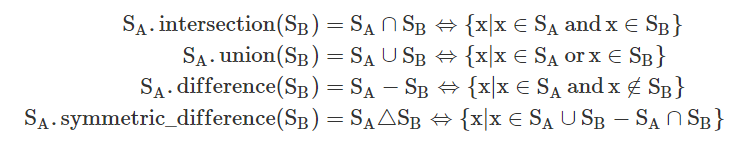
## 2. 一般的索引运算
由于集合的元素是互异的，但是索引中可能有相同的元素，先用` unique `去重后再进行运算。下面构造两张最为简单的示例表进行演示：

In [123]:
df_set_1 = pd.DataFrame([[0,1],[1,2],[3,4]],
                        index = pd.Index(['a','b','a'],name='id1'))
df_set_2 = pd.DataFrame([[4,5],[2,6],[7,1]],
                        index = pd.Index(['b','b','c'],name='id2'))
id1, id2 = df_set_1.index.unique(), df_set_2.index.unique()
id1.intersection(id2)

Index(['b'], dtype='object')

In [124]:
id1.union(id2)

Index(['a', 'b', 'c'], dtype='object')

In [125]:
id1.difference(id2)

Index(['a'], dtype='object')

In [126]:
id2.difference(id1)

Index(['c'], dtype='object')

In [127]:
id1.symmetric_difference(id2)

Index(['a', 'c'], dtype='object')

上述的四类运算还可以用等价的符号表示代替如下：

In [128]:
id1 & id2

Index(['b'], dtype='object')

In [129]:
id1 | id2

Index(['a', 'b', 'c'], dtype='object')

In [130]:
(id1 ^ id2) & id1

Index(['a'], dtype='object')

In [131]:
id1 ^ id2 # ^符号即对称差

Index(['a', 'c'], dtype='object')

若两张表需要做集合运算的列并没有被设置索引，一种办法是先转成索引，运算后再恢复，另一种方法是利用 `isin` 函数，例如在重置索引的第一张表中选出id列交集的所在行：

In [132]:
df_set_1

,0,1
id1,,
a,0,1
b,1,2
a,3,4


In [133]:
df_set_in_col_1 = df_set_1.reset_index()

df_set_in_col_2 = df_set_2.reset_index()

df_set_in_col_1

,id1,0,1
0,a,0,1
1,b,1,2
2,a,3,4


In [134]:
df_set_in_col_1[df_set_in_col_1.id1.isin(df_set_in_col_2.id2)]

,id1,0,1
1,b,1,2
